<a href="https://colab.research.google.com/github/flavianojr1/regressao-linear-aluguel/blob/main/regressao-linear-aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [860]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [861]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [862]:
df.info() # Verificando os tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


Notamos que os dados estão em formatos numéricos, porém os campos **Valor_Aluguel** e **Valor_Condominio** por se tratarem de uma quantidade monetária, o ideal é estar em *float*.  
**Metragem** também é uma medida de área, e pode haver números decimais.

In [863]:
# Alterando valores monetários para float
df['Valor_Aluguel'] = df['Valor_Aluguel'].astype(float)
df['Valor_Condominio'] = df['Valor_Condominio'].astype(float)

# Alterando medidas de área para float
df['Metragem'] = df['Metragem'].astype(float)

df.info() # Conferindo o resultado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Valor_Aluguel     7203 non-null   float64
 1   Valor_Condominio  7203 non-null   float64
 2   Metragem          7203 non-null   float64
 3   N_Quartos         7203 non-null   int64  
 4   N_banheiros       7203 non-null   int64  
 5   N_Suites          7203 non-null   int64  
 6   N_Vagas           7203 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 394.0 KB


### Verificando por valores nulos

In [864]:
df.isnull().sum()

,0
Valor_Aluguel,0
Valor_Condominio,0
Metragem,0
N_Quartos,0
N_banheiros,0
N_Suites,0
N_Vagas,0


O DataFrame não retornou dados nulos.

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [865]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


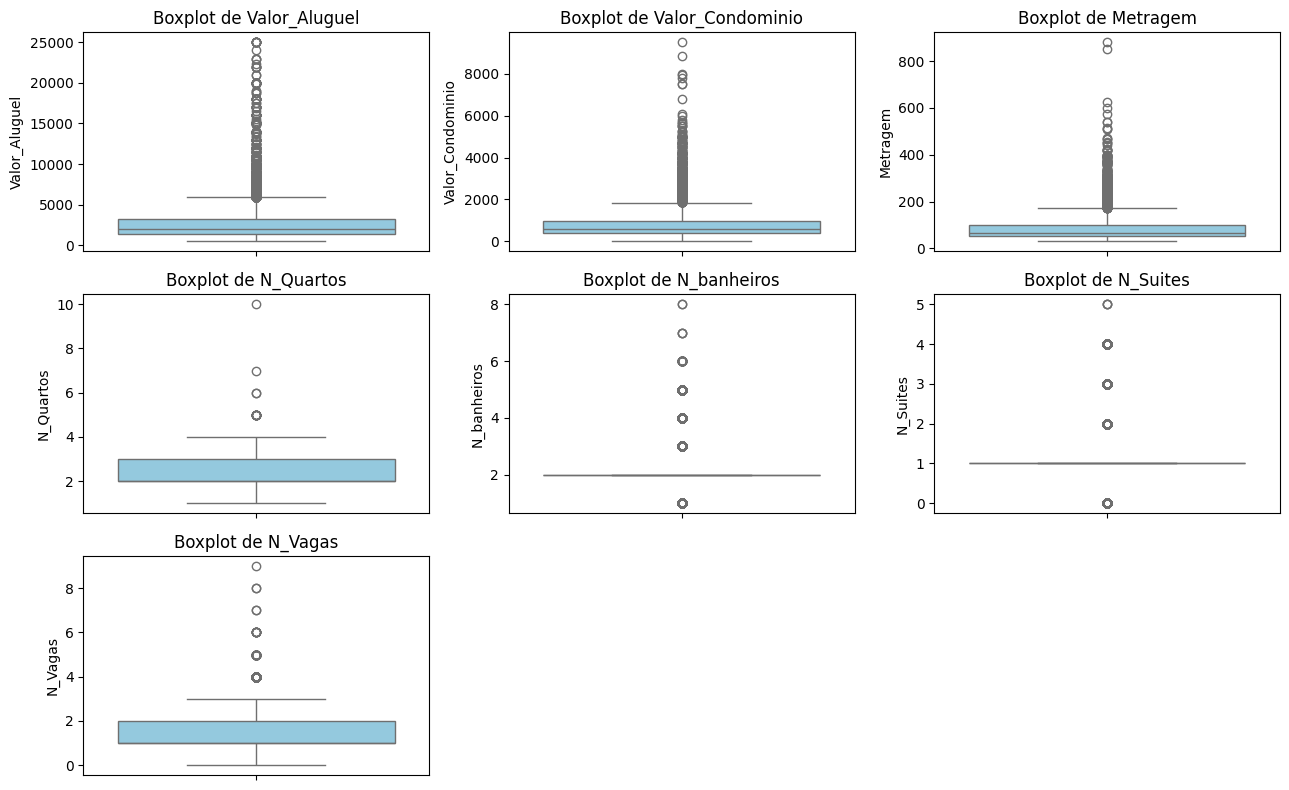

In [866]:
plt.figure(figsize=(13, 8))

colunas_numericas = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']

for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=coluna, color='skyblue')
    plt.title(f'Boxplot de {coluna}')
    plt.tight_layout()

plt.show()

Temos diversos outliers como observado acima.  
A primeira análise que vamos fazer é sobre a metragem.  
**Podemos notar alguns pontos vistos acima:**
- Temos uma grande distribuição de N_Vagas abaixo de 3
- Grande concentração de 2 N_banheiros
- A massiva maioria tem apenas 1 N_Suites
- Grande maioria para menos que 4 quartos
- Grande maioria para apartamentos menores que 200 metros

### Analisando Metragem por Valor_Aluguel

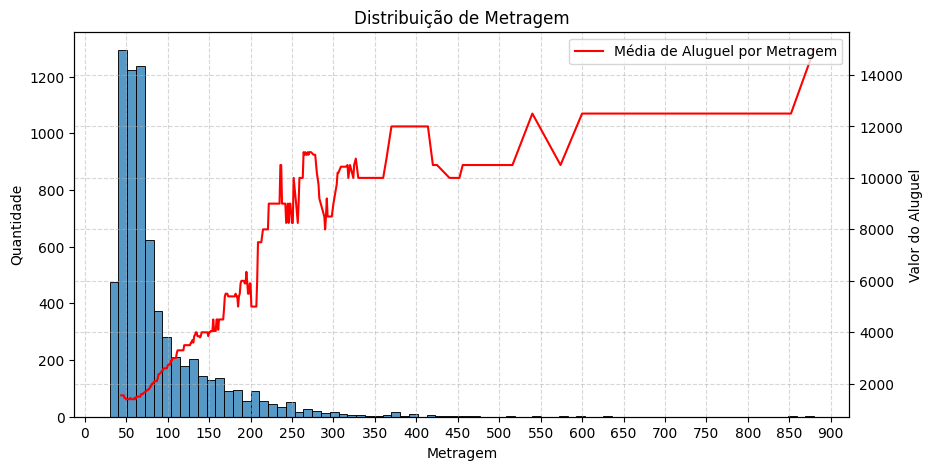

In [867]:
# Configurando para que o gráfico tenha dois tipos
fig, ax1 = plt.subplots(figsize=(10, 5))

# Histograma de 'Metragem'
sns.histplot(
    data=df,
    x='Metragem',
    bins=80,
    ax=ax1
)
# Configuração do gráfico histograma
ax1.set_xlabel('Metragem')
ax1.set_ylabel('Quantidade')
ax1.set_title('Distribuição de Metragem')

ax1.grid(True, axis='x', linestyle='--', alpha=0.5)
ax1.set_xticks(range(0, 1001, 50)) # Configura o intervalo de 50 em 50 para Metragem

# Plotando o segundo gráfico em cima do primeiro
ax2 = ax1.twinx()

# Suavizando a media de valores por metragem
media_aluguel_metragem = df.groupby('Metragem')['Valor_Aluguel'].median()
media_alguel_suavizada = media_aluguel_metragem.rolling(window=15).median()

# Plotando o segundo gráfico em cima do primeiro
ax2.plot(
    media_alguel_suavizada.index,
    media_alguel_suavizada.values,
    color='red',
    label='Média de Aluguel por Metragem'
)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.set_ylabel('Valor do Aluguel')
ax2.legend(loc='upper right')

fig.show()

In [868]:
print('Média de Aluguel para Metragem menor que 300: ', df[df['Metragem'] <= 300]['Valor_Aluguel'].mean())
print('Mediana de Aluguel para Metragem menor que 300: ', df[df['Metragem'] <= 300]['Valor_Aluguel'].median())
print('Média de Aluguel para Metragem: ', df['Valor_Aluguel'].mean())
print('Mediana de Aluguel para Metragem: ', df['Valor_Aluguel'].median())
print('Quantidade de linhas para Metragem maior que 300: ', df[df['Metragem'] >= 300].value_counts().sum())

Média de Aluguel para Metragem menor que 300:  2851.1087995501825
Mediana de Aluguel para Metragem menor que 300:  1950.0
Média de Aluguel para Metragem:  2966.5961404970153
Mediana de Aluguel para Metragem:  2000.0
Quantidade de linhas para Metragem maior que 300:  97


Podemos notar que temos apenas 97 alugueis com metragem acima de 300 e pouco influencia na mediana/media ao filtrar para menores que 300 metros.  
Vamos analisar como fica os outliers e as distribuições filtrando para valores de 'Metragem' menores que 300.

In [869]:
df = df[df['Metragem'] <= 300]
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7114.00000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000
mean,2851.10880,771.478915,84.679927,2.279308,2.066348,0.987911,1.410177
std,2694.68028,684.348143,50.302949,0.806624,0.942064,0.833112,0.811583
min,480.00000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1350.00000,393.000000,52.000000,2.000000,2.000000,1.000000,1.000000
50%,1950.00000,589.000000,66.000000,2.000000,2.000000,1.000000,1.000000
75%,3200.00000,950.000000,97.000000,3.000000,2.000000,1.000000,2.000000
max,25000.00000,6059.000000,300.000000,10.000000,7.000000,4.000000,9.000000


Ainda temos valores muito destoantes da média.  
Vamos analisar os valores de alugueis em relação o número de quartos.

### Analisando Imóveis por N_Quartos

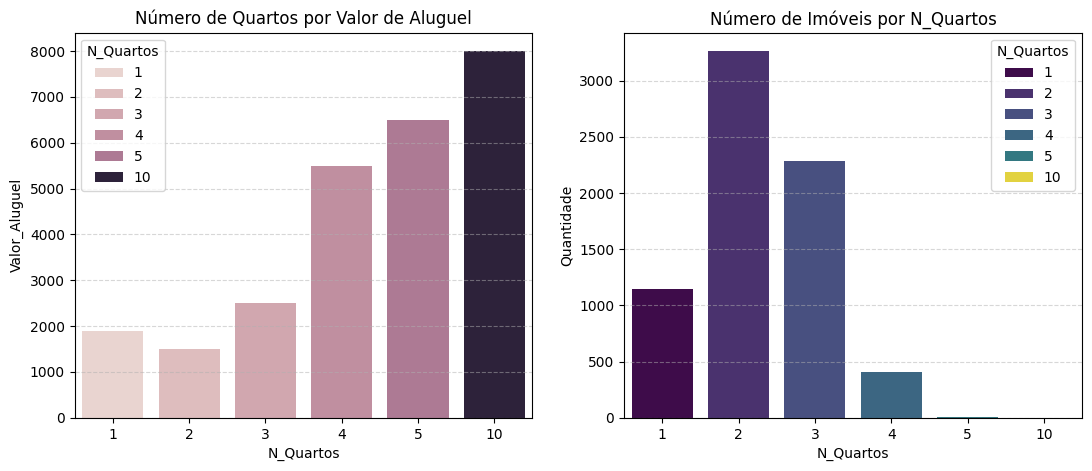

In [870]:
df_n_quartos = df.groupby('N_Quartos')['Valor_Aluguel'].median().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.barplot(
    data=df_n_quartos,
    x='N_Quartos',
    y='Valor_Aluguel',
    hue='N_Quartos',
    ax=axes[0]
)
axes[0].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[0].set_title('Número de Quartos por Valor de Aluguel')

sns.countplot(
    data=df,
    x='N_Quartos',
    ax=axes[1],
    hue='N_Quartos',
    palette='viridis'
)

axes[1].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[1].set_title('Número de Imóveis por N_Quartos')
axes[1].set_ylabel('Quantidade')

plt.show()

Como podemos notar nos gráficos acima, temos alguns insights:  
- O valor de aluguel tende a crescer com mais quartos
- Os valores de alugueis são os mais altos para 10 quartos
- Não temos valores entre 5 e 10 quartos
- A maior quantidade está presente para 4 quartos ou menos
- Pouquíssimos imóveis estão listados para acima de 5 quartos

In [871]:
df = df[df['N_Quartos'] <= 4]
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000,7108.000000
mean,2847.325267,771.115644,84.557541,2.276308,2.064716,0.985931,1.408132
std,2691.025025,684.278061,50.129172,0.798490,0.939887,0.830049,0.806876
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1350.000000,393.000000,52.000000,2.000000,2.000000,1.000000,1.000000
50%,1950.000000,588.000000,66.000000,2.000000,2.000000,1.000000,1.000000
75%,3150.000000,950.000000,97.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,6059.000000,300.000000,4.000000,7.000000,4.000000,9.000000


### Analisando Imóveis por N_banheiros

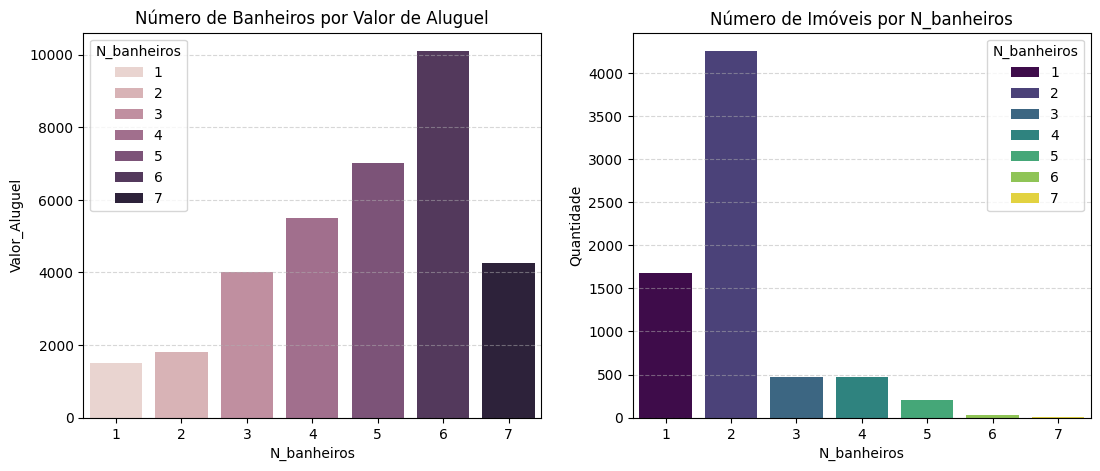

In [872]:
df_n_banheiros = df.groupby('N_banheiros')['Valor_Aluguel'].median().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.barplot(
    data=df_n_banheiros,
    x='N_banheiros',
    y='Valor_Aluguel',
    hue='N_banheiros',
    ax=axes[0]
)
axes[0].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[0].set_title('Número de Banheiros por Valor de Aluguel')

sns.countplot(
    data=df,
    x='N_banheiros',
    ax=axes[1],
    hue='N_banheiros',
    palette='viridis'
)

axes[1].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[1].set_title('Número de Imóveis por N_banheiros')
axes[1].set_ylabel('Quantidade')

plt.show()

- Valores muito altos para N_banheiros maiores que 5
- A partir de 5 N_banheiros, a quantidade de Imóveis cai consideravelmente
- A grande concentração de banheiros está entre 1 e 2 N_banheiros
- Aproximadamente 1000 imóveis entre 3 e 4 N_banheiros, não será desconsiderado da análise

In [873]:
df = df[df['N_banheiros'] <= 5]
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000
mean,2817.244068,765.145198,83.994209,2.270480,2.048870,0.975847,1.400282
std,2624.803373,676.354024,49.350325,0.794193,0.907121,0.815418,0.796730
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1350.000000,390.750000,51.750000,2.000000,2.000000,1.000000,1.000000
50%,1915.000000,585.000000,66.000000,2.000000,2.000000,1.000000,1.000000
75%,3100.000000,950.000000,96.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,6059.000000,300.000000,4.000000,5.000000,4.000000,9.000000


### Analisando Imóveis por N_Suites

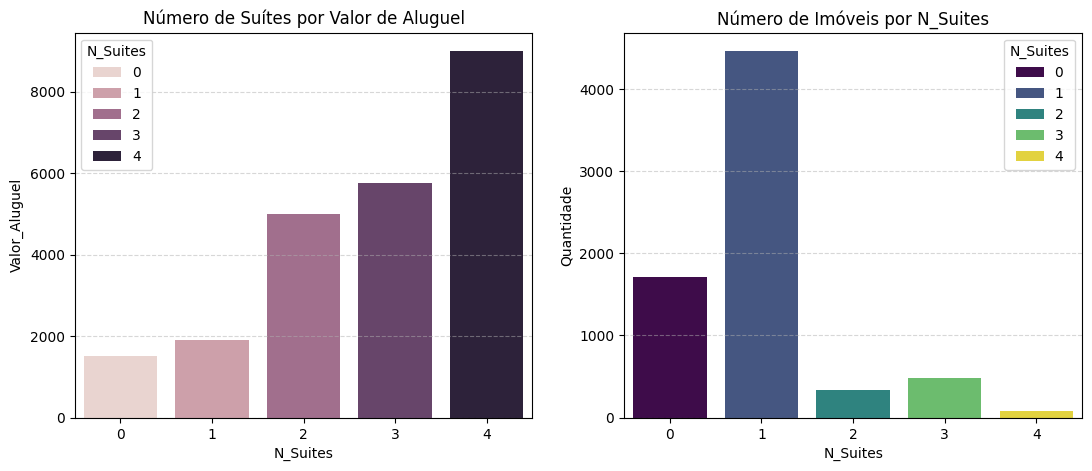

In [874]:
df_n_suites = df.groupby('N_Suites')['Valor_Aluguel'].median().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.barplot(
    data=df_n_suites,
    x='N_Suites',
    y='Valor_Aluguel',
    hue='N_Suites',
    ax=axes[0]
)
axes[0].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[0].set_title('Número de Suítes por Valor de Aluguel')

sns.countplot(
    data=df,
    x='N_Suites',
    ax=axes[1],
    hue='N_Suites',
    palette='viridis'
)

axes[1].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[1].set_title('Número de Imóveis por N_Suites')
axes[1].set_ylabel('Quantidade')

plt.show()

- Existe um salto de preços do Valor_Aluguel para acima de 1 suíte
- A enorme concentração está entre 0 e 1 suíte
- Pouquíssimos apartamentos a partir de 2 suítes ou mais

In [875]:
df = df[df['N_Suites'] <= 4]
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000
mean,2817.244068,765.145198,83.994209,2.270480,2.048870,0.975847,1.400282
std,2624.803373,676.354024,49.350325,0.794193,0.907121,0.815418,0.796730
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1350.000000,390.750000,51.750000,2.000000,2.000000,1.000000,1.000000
50%,1915.000000,585.000000,66.000000,2.000000,2.000000,1.000000,1.000000
75%,3100.000000,950.000000,96.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,6059.000000,300.000000,4.000000,5.000000,4.000000,9.000000


### Analisando Imóveis por N_Vagas


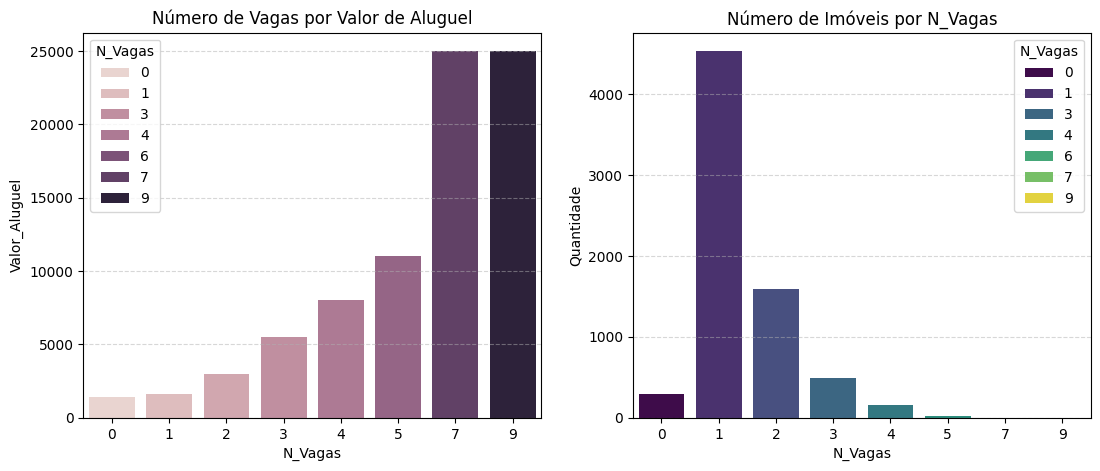

In [876]:
df_n_vagas = df.groupby('N_Vagas')['Valor_Aluguel'].median().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.barplot(
    data=df_n_vagas,
    x='N_Vagas',
    y='Valor_Aluguel',
    hue='N_Vagas',
    ax=axes[0]
)
axes[0].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[0].set_title('Número de Vagas por Valor de Aluguel')

sns.countplot(
    data=df,
    x='N_Vagas',
    ax=axes[1],
    hue='N_Vagas',
    palette='viridis'
)

axes[1].grid(True, linestyle='--', axis='y', alpha=0.5)
axes[1].set_title('Número de Imóveis por N_Vagas')
axes[1].set_ylabel('Quantidade')

plt.show()

- Valores crescentes de aluguel para números maiores de vagas
- Grande concentração de N_Vagas entre 0 e 2
- A partir de 3 N_Vagas, são pouquíssimos imóveis

In [877]:
df = df[df['N_Vagas'] <= 4]
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000
mean,2789.020963,759.727054,83.533428,2.266572,2.042635,0.969688,1.389235
std,2548.596700,666.445883,48.616533,0.791504,0.899400,0.806679,0.768628
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1345.250000,390.000000,51.000000,2.000000,2.000000,1.000000,1.000000
50%,1900.000000,584.500000,66.000000,2.000000,2.000000,1.000000,1.000000
75%,3100.000000,942.000000,96.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,6059.000000,300.000000,4.000000,5.000000,4.000000,4.000000


### Analisando Valor_Aluguel para o DataFrame Filtrado

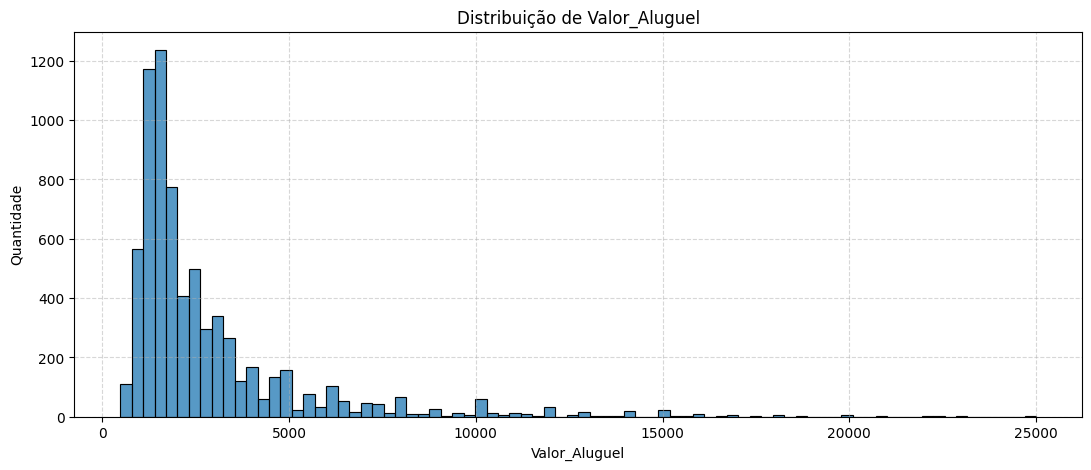

In [878]:
plt.figure(figsize=(13, 5))

sns.histplot(
    data=df,
    x='Valor_Aluguel',
    bins=80
)

plt.title('Distribuição de Valor_Aluguel')
plt.xlabel('Valor_Aluguel')
plt.ylabel('Quantidade')
plt.grid(True, linestyle='--', alpha=0.5)

# plt.xticks(range(0, 8001, 500))
# plt.yticks(range(0, 1151, 100))

plt.show()

- Com o gráfico acima, temos que a grande quantidade de Imóveis está abaixo de 8000 para Valor_Aluguel.  
- Existem outros imóveis acima de 8000 porém são baixas quantidades, com valores muito altos que atrapalham nosso modelo.  

Vamos filtrar aqui o Valor_Aluguel para ser abaixo de 8000.

In [879]:
# df_filtrado = df_filtrado[df_filtrado['Valor_Aluguel'] <= 8000]
# df = df_filtrado
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000
mean,2789.020963,759.727054,83.533428,2.266572,2.042635,0.969688,1.389235
std,2548.596700,666.445883,48.616533,0.791504,0.899400,0.806679,0.768628
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1345.250000,390.000000,51.000000,2.000000,2.000000,1.000000,1.000000
50%,1900.000000,584.500000,66.000000,2.000000,2.000000,1.000000,1.000000
75%,3100.000000,942.000000,96.000000,3.000000,2.000000,1.000000,2.000000
max,25000.000000,6059.000000,300.000000,4.000000,5.000000,4.000000,4.000000


In [880]:
median_n_quartos = df['N_Quartos'].median()
median_n_banheiros = df['N_banheiros'].median()
median_n_suites = df['N_Suites'].median()
median_n_vagas = df['N_Vagas'].median()

print('A mediana de N_Quartos é: ', median_n_quartos)
print('A mediana de N_banheiros é: ', median_n_banheiros)
print('A mediana de N_Suites é: ', median_n_suites)
print('A mediana de N_Vagas é: ', median_n_vagas)

A mediana de N_Quartos é:  2.0
A mediana de N_banheiros é:  2.0
A mediana de N_Suites é:  1.0
A mediana de N_Vagas é:  1.0


# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [881]:
correlacao = df.corr()
# correlacao

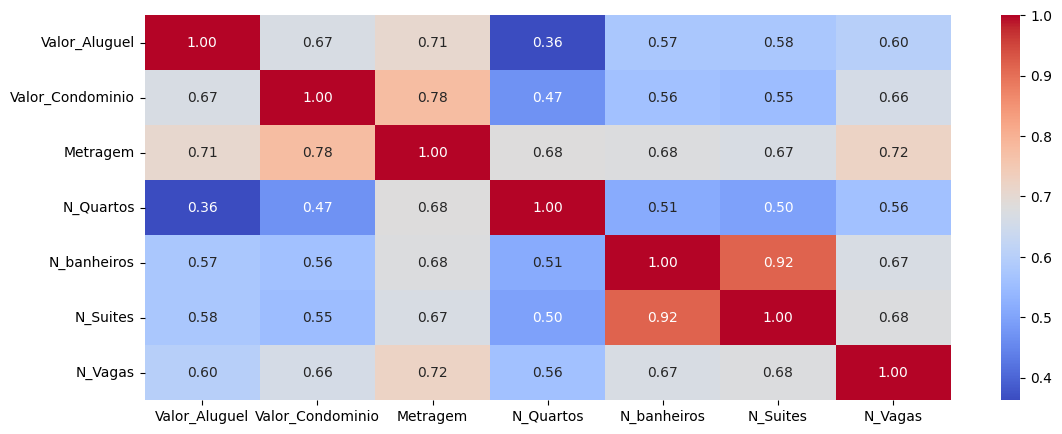

In [882]:
plt.figure(figsize=(13, 5))
sns.heatmap(
    data=correlacao,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.show()

- As maiores correlações com Valor_Aluguel são **Valor_Condominio** e **Metragem**
- O tamanho do Imóvel tem correlação positiva com o Valor do Aluguel
- Aluguéis mais caros tendem a ter condomínios mais caros
- Relação positiva porém fraca para número de quartos, banheiros, suítes
- Leve relação positiva para o N_Vagas para o Imóvel  


---


Como a grande maioria de quartos, banheiros, suítes e vagas está entre 2 e 1 no nosso df_filtrado, o que mais vai ter correlação com Valor_Aluguel realmente vai ser **Metragem** e **Valor_Condominio**


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [883]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [884]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [885]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (5295, 6)
X_test shape:  (1765, 6)
y_train shape:  (5295,)
y_test shape:  (1765,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [886]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)

# y_train não puxa nenhuma coluna pois ela já é a variável dependente Valor_Aluguel

# se você deu um nome diferente para x train e y train, altere no código.

In [887]:
regressao_valor_aluguel = LinearRegression()
regressao_valor_aluguel.fit(X, y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [888]:
print('Coeficiente angular: ', regressao_valor_aluguel.coef_)
print('Coeficiente linear: ', regressao_valor_aluguel.intercept_)

Coeficiente angular:  [37.93549206]
Coeficiente linear:  -364.20167704284404


Nossa equação seria: Valor_Aluguel = 21,43 * 'Metragem' + 619,29

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [889]:
r2_quadrado = regressao_valor_aluguel.score(X, y)
print('R²: ', r2_quadrado)

R²:  0.5041566768737793


Com o **R² = 0.259**, o modelo linear simples mostra que quase 26% do valor do aluguel pode ser impactado pela metragem, porém muitos outros fatores influenciam no valor, sendo necessário uma regressão linear multipla.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

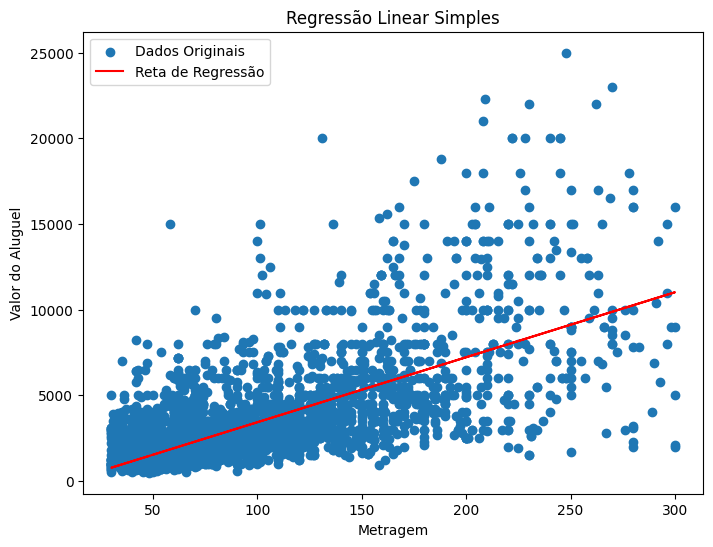

In [890]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Dados Originais')
plt.plot(X, regressao_valor_aluguel.predict(X), color='red', label='Reta de Regressão')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [891]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [892]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_valor_aluguel.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_valor_aluguel.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.48562963505042167


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Obtivemos dois valores muito próximos de R², tanto no teste quanto no treino. Com apenas alguns milésimos de diferença, podemos perceber que o modelo não está *overfitted*.  
  
No entanto, é importante destacar que o R² ainda é considerado baixo. Embora a metragem tenha influência sobre o valor do aluguel, é necessário incluir outras variáveis para construir um modelo mais preciso.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [893]:
X = df[['Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']]
y = df['Valor_Aluguel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [894]:
regressao_aluguel_multipla = LinearRegression()
regressao_aluguel_multipla.fit(X_train, y_train)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [895]:
r2_train = regressao_aluguel_multipla.score(X_train, y_train)
print('O coeficiente angular é: ', regressao_aluguel_multipla.coef_)
print('O coeficiente linear é: ', regressao_aluguel_multipla.intercept_)
print('O R quadrado é: ', regressao_aluguel_multipla.score(X_train, y_train))

O coeficiente angular é:  [   0.85314001   27.0868975  -744.08909494  180.26278852  311.3153025
  357.95965239]
O coeficiente linear é:  413.2691054996226
O R quadrado é:  0.5815103592500832


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [896]:
r2_test = regressao_aluguel_multipla.score(X_test, y_test)
r2_test

0.5755481118193809

E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Digite sua resposta aqui